-- UN Project --

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

-- Q4 -- Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [180]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

<font color='yellow'>---------------------------------------------------------------------------------------------------------------------------------------------------------</font>

-- Q5 -- How many rows and columns are in `gdp_df`? What are the data types of each column?

In [183]:
gdp_df.shape

(8219, 4)

** Q5 -- ANSWER: 8219 Rows and 4 Columns

<font color='yellow'>---------------------------------------------------------------------------------------------------------------------------------------------------------</font>

-- Q6 -- Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [187]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])
gdp_df = gdp_df.rename(columns = {'Country or Area' : 'Country', 'Value' : 'GDP_Per_Capita'})
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


<font color='yellow'>---------------------------------------------------------------------------------------------------------------------------------------------------------</font>

-- Q7 -- How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [194]:
distinct_countries = gdp_df['Country'].nunique()

distinct_countries

247

In [196]:
 years_w_data = gdp_df['Country'].value_counts()
years_w_data.tail(25)

Country
Germany                               34
Ghana                                 34
Greece                                34
Equatorial Guinea                     34
Grenada                               34
Europe & Central Asia (IDA & IBRD)    34
Bhutan                                33
Syrian Arab Republic                  33
Somalia                               33
Tonga                                 33
Lebanon                               33
Greenland                             32
West Bank and Gaza                    30
Serbia                                29
Montenegro                            27
San Marino                            26
CuraÃ§ao                              24
Afghanistan                           24
Virgin Islands                        21
Cayman Islands                        18
Faroe Islands                         16
Kosovo                                16
Sint Maarten (Dutch part)             15
Turks and Caicos Islands              13
Djibouti

** Q7 -- ANSWER: 228 Countries have data for all years, 19 Countries do not have data for all years.

<font color='yellow'>---------------------------------------------------------------------------------------------------------------------------------------------------------</font>

-- Q8 -- In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [200]:
gdp_in_2020 = gdp_df[gdp_df.Year == 2020]
gdp_in_2020

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748
...,...,...,...
8068,Virgin Islands,2020,45055.782930
8090,West Bank and Gaza,2020,5423.682547
8120,World,2020,18600.986362
8154,Zambia,2020,3391.595412


-- HISTOGRAM PLOT --

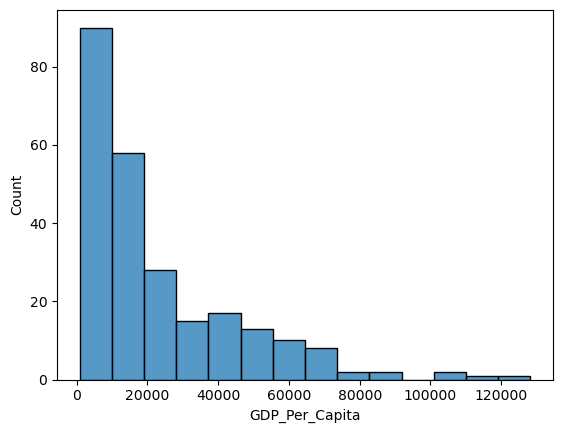

In [202]:
sns.histplot(gdp_in_2020.GDP_Per_Capita);

-- KDE PLOT --

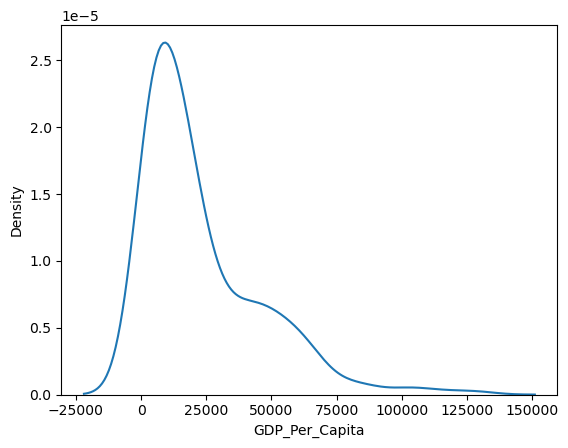

In [204]:
sns.kdeplot(gdp_in_2020.GDP_Per_Capita);

-- BOX PLOT --

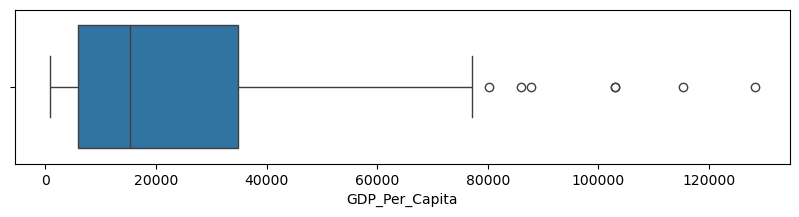

In [206]:
plt.figure(figsize = (10,2))
sns.boxplot(x = gdp_in_2020.GDP_Per_Capita);

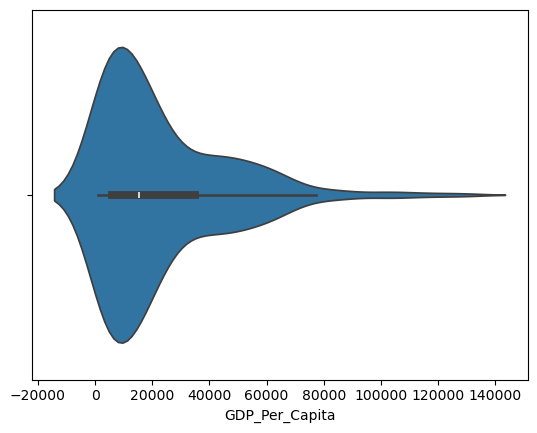

In [208]:
sns.violinplot(x = gdp_in_2020.GDP_Per_Capita);

<font color='yellow'>---------------------------------------------------------------------------------------------------------------------------------------------------------</font>

-- Q9 -- What was the median GDP per capita value in 2020?

In [253]:
gdpmedian = gdp_in_2020.GDP_Per_Capita.median()
gdpmedian

15309.23598817024

** Q9 -- ANSWER: 15309.24

<font color='yellow'>---------------------------------------------------------------------------------------------------------------------------------------------------------</font>

-- Q10 -- For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn) 

In [34]:
decades = [1990,2000,2010,2020]

In [35]:
gdp_decades = gdp_df.loc[gdp_df.Year.isin(decades)]

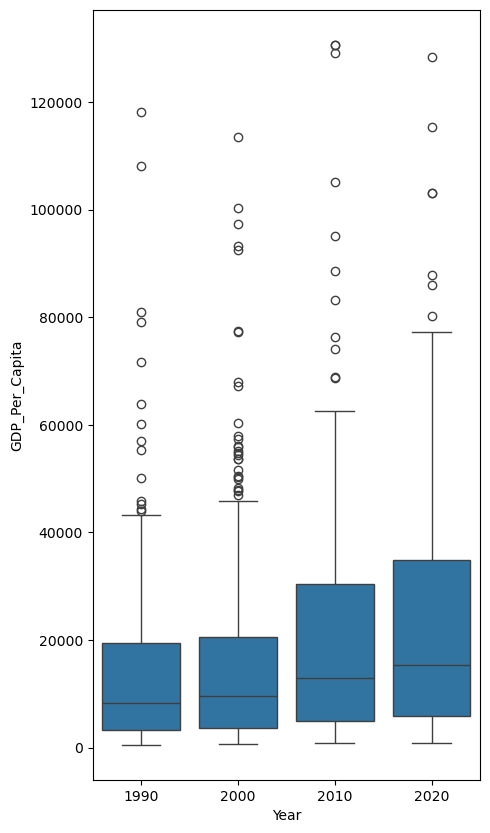

In [267]:
plt.figure(figsize = (5,10))
sns.boxplot(y= gdp_decades.GDP_Per_Capita, x = gdp_decades.Year);

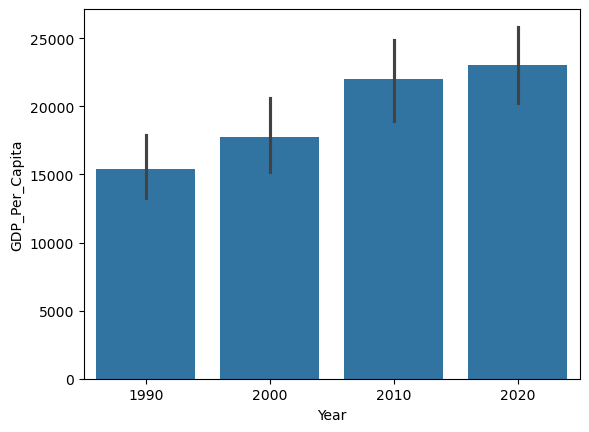

In [269]:
sns.barplot(x = gdp_decades.Year, y = gdp_decades.GDP_Per_Capita);

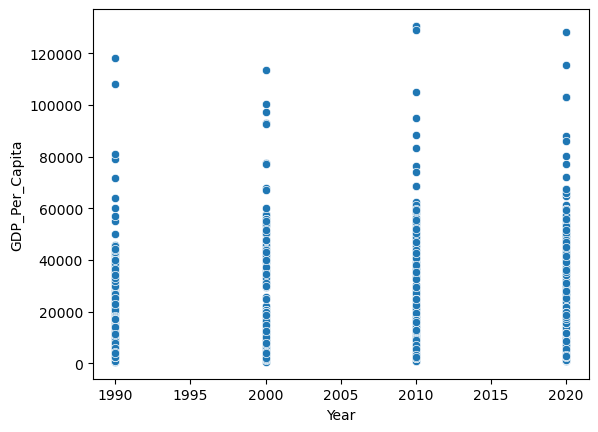

In [277]:
sns.scatterplot(x = gdp_decades.Year, y = gdp_decades.GDP_Per_Capita);

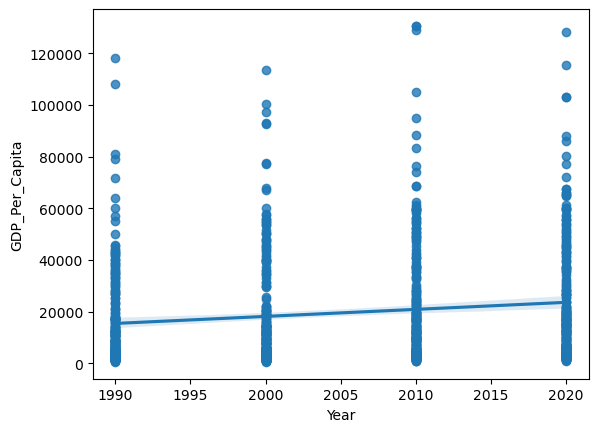

In [273]:
sns.regplot(x = gdp_decades.Year, y = gdp_decades.GDP_Per_Capita);

<font color='yellow'>---------------------------------------------------------------------------------------------------------------------------------------------------------</font>

-- Q11 -- Which country was the first to have a GDP per capita greater than $100,000?

In [41]:
# BY DECADES DF

In [42]:
gdp_over_100k = gdp_decades[gdp_decades.GDP_Per_Capita >= 100000]

In [43]:
gdp_over_100k.sort_values(['Year', 'GDP_Per_Capita'], ascending = True)

,Country,Year,GDP_Per_Capita
7827,United Arab Emirates,1990,108057.042464
974,Brunei,1990,118163.683198
964,Brunei,2000,100323.440022
4446,Luxembourg,2000,113436.588273
751,Bermuda,2010,105121.639689
6129,Qatar,2010,129045.005599
4470,"Macao SAR, China",2010,130596.059759
4436,Luxembourg,2010,130620.266278
3493,Ireland,2020,102989.787335
6119,Qatar,2020,103061.913414


In [44]:
# BY ALL YEARS DF

In [45]:
gdp_100k = gdp_df[gdp_df.GDP_Per_Capita >= 100000]
gdp_100k.sort_values(['Year', 'GDP_Per_Capita'], ascending = True)

,Country,Year,GDP_Per_Capita
7827,United Arab Emirates,1990,108057.042464
974,Brunei,1990,118163.683198
7826,United Arab Emirates,1991,103098.537132
973,Brunei,1991,118220.683619
7825,United Arab Emirates,1992,101100.487512
...,...,...,...
4457,"Macao SAR, China",2023,104961.643485
3490,Ireland,2023,115401.125283
6116,Qatar,2023,116159.142559
6511,Singapore,2023,127543.554752


** Q11 -- ANSWER: UAE and Brunei in 1990 with a GDP per Capita of $108,057.04 and $118,163.68 respectively 

<font color='yellow'>---------------------------------------------------------------------------------------------------------------------------------------------------------</font>

-- Q12 -- Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [49]:
gdp_in_2020.sort_values('GDP_Per_Capita', ascending = False)

,Country,Year,GDP_Per_Capita
4426,Luxembourg,2020,128256.560341
6514,Singapore,2020,115304.149459
6119,Qatar,2020,103061.913414
3493,Ireland,2020,102989.787335
741,Bermuda,2020,87894.401174
...,...,...,...
5133,Mozambique,2020,1466.124765
6699,Somalia,2020,1396.053436
1734,Dem. Rep. Congo,2020,1277.632863
1302,Central African Republic,2020,1136.570530


** Q12 -- ANSWER: Luxemborg with a GDP per Capita of $128,256.56

** Q12 -- CHART

In [52]:
gdp_lux = gdp_df[gdp_df.Country == 'Luxembourg']

C:\Users\jeepf\AppData\Local\Temp\ipykernel_26604\1705490696.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  yr.set_xticklabels(yr.get_xticklabels(), rotation=45);


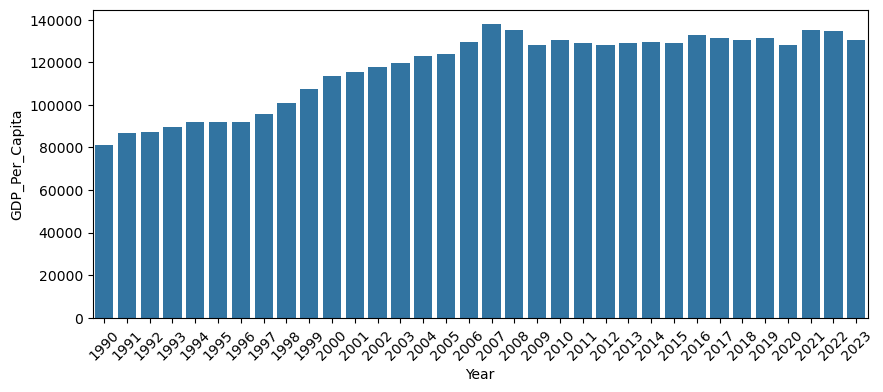

In [53]:
plt.figure(figsize = (10,4))
yr = sns.barplot(y = gdp_lux.GDP_Per_Capita, x = gdp_lux.Year)
yr.set_xticklabels(yr.get_xticklabels(), rotation=45);

<font color='yellow'>---------------------------------------------------------------------------------------------------------------------------------------------------------</font>

-- Q13 -- Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [56]:
gdp_in_2020.sort_values('GDP_Per_Capita', ascending = True)

,Country,Year,GDP_Per_Capita
1046,Burundi,2020,833.920257
1302,Central African Republic,2020,1136.570530
1734,Dem. Rep. Congo,2020,1277.632863
6699,Somalia,2020,1396.053436
5133,Mozambique,2020,1466.124765
...,...,...,...
741,Bermuda,2020,87894.401174
3493,Ireland,2020,102989.787335
6119,Qatar,2020,103061.913414
6514,Singapore,2020,115304.149459


** Q13 -- ANSWER: Burundi with a GDP per Capita of $833.92

** Q13 -- CHART

In [59]:
gdp_bur = gdp_df[gdp_df.Country == 'Burundi']

C:\Users\jeepf\AppData\Local\Temp\ipykernel_26604\3570850294.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  yr.set_xticklabels(yr.get_xticklabels(), rotation=45);


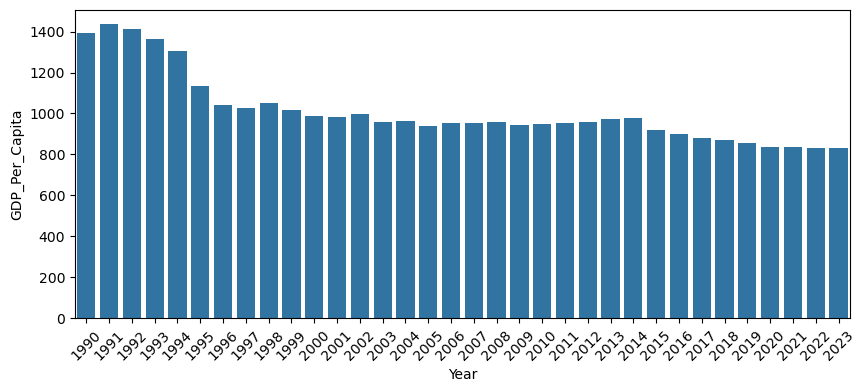

In [60]:
plt.figure(figsize = (10,4))
yr = sns.barplot(y = gdp_bur.GDP_Per_Capita, x = gdp_bur.Year)
yr.set_xticklabels(yr.get_xticklabels(), rotation=45);

<font color='yellow'>---------------------------------------------------------------------------------------------------------------------------------------------------------</font>

-- Q14 --  Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [63]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 6083)
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


<font color='yellow'>---------------------------------------------------------------------------------------------------------------------------------------------------------</font>

-- Q15 -- Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [66]:
internet_df = internet_df.drop(columns = 'Value Footnotes')

In [67]:
internet_df

,Country or Area,Year,Value
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [68]:
internet_df = internet_df.rename(columns = {'Country or Area' : 'country', 'Year' : 'year', 'Value' : 'internet_users_pct'})

<font color='yellow'>---------------------------------------------------------------------------------------------------------------------------------------------------------</font>

-- Q16 -- Look at the number of observations in this dataset per year. What do you notice?

In [71]:
internet_df.info

<bound method DataFrame.info of           country  year  internet_users_pct
0     Afghanistan  2019           17.600000
1     Afghanistan  2018           16.800000
2     Afghanistan  2017           13.500000
3     Afghanistan  2016           11.000000
4     Afghanistan  2015            8.260000
...           ...   ...                 ...
6078     Zimbabwe  1997            0.033080
6079     Zimbabwe  1996            0.016790
6080     Zimbabwe  1995            0.007684
6081     Zimbabwe  1994            0.001739
6082     Zimbabwe  1990            0.000000

[6083 rows x 3 columns]>

In [72]:
internet_df.year.value_counts().sort_index()

year
1990    226
1991     39
1992     50
1993     66
1994     92
1995    141
1996    177
1997    188
1998    195
1999    207
2000    210
2001    212
2002    214
2003    208
2004    210
2005    212
2006    212
2007    217
2008    214
2009    214
2010    209
2011    214
2012    209
2013    203
2014    204
2015    203
2016    206
2017    205
2018    174
2019    185
2020    186
2021    186
2022    184
2023     11
Name: count, dtype: int64

<font color='yellow'>---------------------------------------------------------------------------------------------------------------------------------------------------------</font>

-- Q17 -- What is the first year to have a non-zero internet users percentage value?

In [75]:
internet_df.groupby(['year'])['internet_users_pct'].sum()

year
1990        5.032933
1991       10.931879
1992       19.951843
1993       30.144702
1994       60.571017
1995      133.724628
1996      258.615227
1997      477.813944
1998      778.272406
1999     1296.511722
2000     1959.800955
2001     2420.561957
2002     3048.074208
2003     3487.838864
2004     4055.764307
2005     4578.327138
2006     5130.809568
2007     5665.714672
2008     6189.049190
2009     6765.180090
2010     7259.655600
2011     8079.495520
2012     8362.030980
2013     8676.497320
2014     9303.404670
2015     9832.209260
2016    10666.684550
2017    11255.077100
2018    10124.626800
2019    11391.434770
2020    12231.569060
2021    12794.029210
2022    13092.763700
2023      952.773300
Name: internet_users_pct, dtype: float64

In [76]:
O_internet = internet_df[internet_df.internet_users_pct <= 0]

In [77]:
O_internet.year.value_counts().sort_index()

year
1990    207
1991      8
1992      7
1993     11
1994     12
1995     12
1996      5
1997      2
1998      1
1999      1
2000      1
2001      1
2002      2
2003      1
2004      1
2005      1
2006      1
2007      1
2008      1
2009      1
2010      1
2011      1
2012      1
Name: count, dtype: int64

** Q17 -- ANSWER: 2013 Was the first year that no country had a zero internet pct

<font color='yellow'>---------------------------------------------------------------------------------------------------------------------------------------------------------</font>

-- Q18 -- How does the distribution of internet users percent differ for 2000 and 2014?

In [81]:
int_00_14_list = [2000,2014]
int_00_14 = internet_df[internet_df.year.isin(int_00_14_list)]
int_00_14

,country,year,internet_users_pct
5,Afghanistan,2014,7.000000
28,Albania,2014,54.300000
42,Albania,2000,0.114097
57,Algeria,2014,29.500000
71,Algeria,2000,0.491706
...,...,...,...
6017,Yemen,2000,0.082500
6031,Zambia,2014,6.500000
6045,Zambia,2000,0.191072
6061,Zimbabwe,2014,16.364700


In [82]:
int_00_14.groupby(['year'])['internet_users_pct'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2000,210.0,9.332385,13.644205,0.00,0.482059,2.88668,10.539025,58.6207
2014,204.0,45.604925,29.295667,0.99,17.403300,46.81800,70.262500,98.1580


<font color='yellow'>---------------------------------------------------------------------------------------------------------------------------------------------------------</font>

-- Q19 -- For how many countries was the percentage of internet users below 5% in 2014?

In [85]:
internet2014 = internet_df[internet_df.year == 2014]

In [86]:
below5 = internet2014[internet2014.internet_users_pct <= 5].sort_values('internet_users_pct', ascending = False)
below5.country.count()

10

** Q19 -- 10 Countries internet pct usage were below 5% in 2014

<font color='yellow'>---------------------------------------------------------------------------------------------------------------------------------------------------------</font>

-- Q20 -- Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [90]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df,
                                left_on = ['Country','Year'], right_on = ['country','year'],
                                how = 'left')

In [91]:
gdp_and_internet_use = gdp_and_internet_use.drop(columns = ['country','year'])

<font color='yellow'>---------------------------------------------------------------------------------------------------------------------------------------------------------</font>

--  Q21 -- Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [94]:
gdpint2014 = gdp_and_internet_use[gdp_and_internet_use.Year == 2014]

In [95]:
gdpint2014_sort = gdpint2014.sort_values('internet_users_pct', ascending = False)
gdpint2014_sort.head(3)

,Country,Year,GDP_Per_Capita,internet_users_pct
3193,Iceland,2014,57981.199448,98.1580
747,Bermuda,2014,92298.387811,96.8000
5547,Norway,2014,84753.668395,96.3005


In [96]:
topcountries = ['Iceland', 'Bermuda', 'Norway']
top3 = gdp_and_internet_use[gdp_and_internet_use.Country.isin(topcountries)]

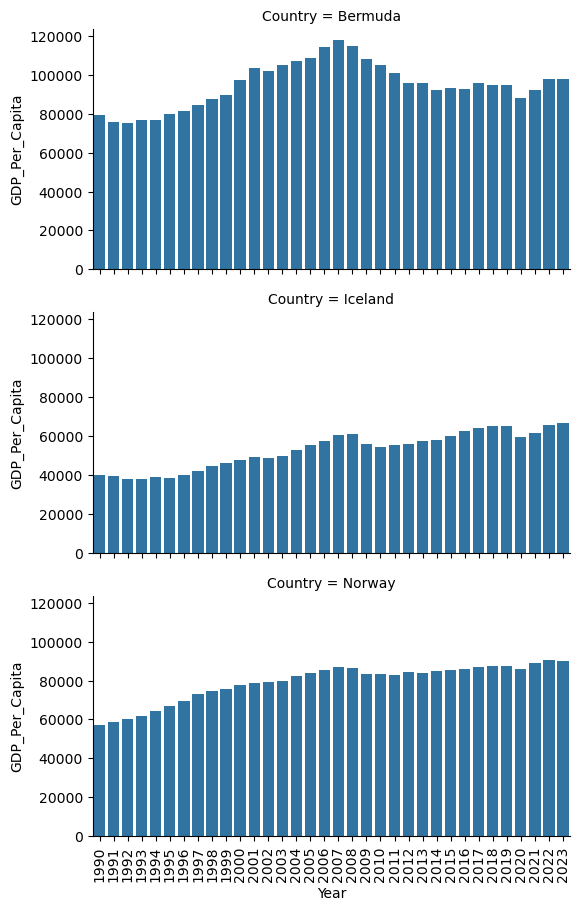

In [97]:
chart = sns.FacetGrid(top3, row = 'Country', height = 3, aspect = 2)
chart.map_dataframe(sns.barplot, y = 'GDP_Per_Capita', x = 'Year')
chart.set_xticklabels(yr.get_xticklabels(), rotation=90);

<font color='yellow'>---------------------------------------------------------------------------------------------------------------------------------------------------------</font>

-- Q22 -- Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [100]:
gdp_and_internet_use_2014 = gdpint2014

<font color='yellow'>---------------------------------------------------------------------------------------------------------------------------------------------------------</font>

-- Q23 --  Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

<Axes: xlabel='internet_users_pct', ylabel='GDP_Per_Capita'>

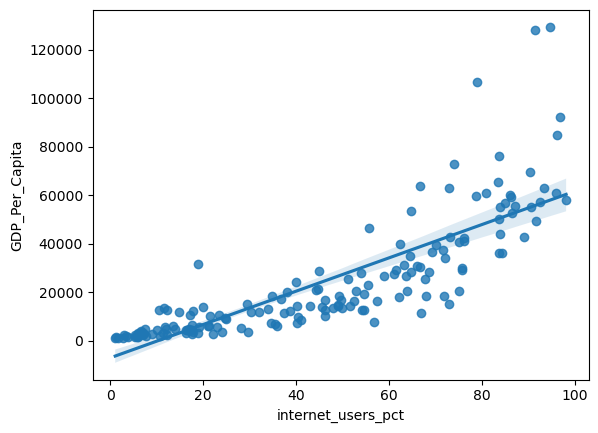

In [103]:
sns.regplot(x = gdp_and_internet_use_2014.internet_users_pct, y = gdp_and_internet_use_2014.GDP_Per_Capita)